![WeTheGeeksV3.jpg](https://raw.githubusercontent.com/ptsireunion/CPGE-PT-Reunion/main/WeTheGeeksV3.jpg)
 
<div class="alert alert-block alert-info">
    <b> PYTHON – Travaux Dirigés N°14
</div>

# Thermochimie - Optimisation chimique
>Physique Chimie `CPGE PT` lien vers le blog <a> https://cpge-reunion-ptsi.blogspot.com/p/python_6.html </a>


In [2]:
# import des librairies 
import numpy as np
import matplotlib.pyplot as plt

##  Synthèse de l'ammoniac - Influence de la pression

> **Question 1** :
> Écrire l’équation de la réaction de formation de l’ammoniac en choisissant comme nombres stoëchiométriques les
plus petits entiers possible.

On réalise différentes simulations numériques de la fraction molaire en ammoniac $\text{x}_\text{NH3}$ dans le mélange à l’équilibre
en faisant varier indépendamment la pression à température fixe et dans le cas de conditions initiales stoëchiométriques. On obtient les résultats suivants.
>
>![x_de_P.jpg](https://raw.githubusercontent.com/ptsireunion/CPGE-PT-Reunion/main/x_de_P.jpg)

> **Question 2** :
> Démontrer que la loi de modération de Le Châtelier est vérifiée

On cherche à déterminer la fraction molaire d'ammoniac $\text{x}_\text{NH3}$  du mélange réactionnel une fois l’état d’équilibre chimique atteint. On se place dans les conditions industrielles à 450 °C, proportions stoëchiométriques, diazote pur obtenu par filtration d’air dans le réacteur. On raisonne pour une quantité de matière initiale $n^0_{N_2}= n mol$ de diazote. Le réactif coûteux étant le dihydrogène, on s’intéresse à son taux de conversion $τ$ , défini comme le rapport entre la quantité de matière de dihydrogène consommée et la quantité de matière de dihydrogène apportée dans le réacteur. On prendre comme constante d'équilibre $K^0=2,76.10^{-5}$ pour une température $T=450^0C$

> **Question 2** : Montrer que l’avancement de la réaction est donné par $ξ = τ.n$

> Corrigé partiel :

&nbsp;
tableau d'avancement en fonction de $\xi$ :

|$\text{mol}$|$\text{N}_{2(g)}$|$+ \text{3H}_{2(g)}$|$\to \text{NH}_{3(g)}$|$n_\text{tot}^\text{gaz}$|
|:------------|:-------:|:-------:|:-------:|:------------:|
|$\text{E.I.}$|$n$    |$3n$    |$0$    |$n+3n$    |
|$\forall t$  |$n-\xi$|$3n-3\xi$|$2\xi$|$4n-2\xi$|

> **Question 3** : Montrer que la quantité totale de gaz $n_\text{tot}^\text{gaz}=\dfrac{17}{4}.n-2\tau.n$

> **Question 4** : Montrer que la fraction molaire $x_{NH_3}=\dfrac{1}{\dfrac{17}{8.\tau}-1}$

> **Question 5** : Montrer que le quotient réactionnel $Q=\dfrac{4.\tau^2}{27.(1-\tau)^4}.(\dfrac{17}{4}-2\tau)^2.(\dfrac{P^0}{P})^2$

# Mise en œuvre numérique avec la méthode de DICHOTOMIE
&nbsp;
Les méthodes de dichotomie et de Newton vues en 1ère année permettent de trouver une racine d'une fonction $f$ quelconque dans un intervalle $[a,b]$ ou à partir d'une valeur proche. On s'intéressera à la 1ère

&nbsp;
L'intervalle de recherche à donner pour la méthode de `dichotomie` est celui compris entre les valeurs extrêmes possibles de $\tau$ : $\tau_\text{min}=0\text{mol}$ (réaction quantitative en sens indirect) et $\tau_\text{max}=0,999\text{mol}$ (exclu de la recherche car cela donnerait $Q\to +\infty$).

&nbsp;
Il ne reste qu'à coder une fonction $\tau \mapsto Q(\tau)-K^\circ$  qui s'annule à l'équilibre.

> **Question 6** : Ecrire la fonction $f$ qui prend $\tau$ et la pression $P$ comme arguments et qui retourne la valeur théorique de ma différence entre le quotient réactionnel et la constante de réaction

In [3]:
# fonction qui s'annule lorsque tau=tau_eq
K = 2.76e-5
def f(tau,P):
    Press=P
    return 4 * tau **2 / (27*(1 - tau) **4) * (17/4 - 2* tau) **2 / Press **2 - K


Écrire un code Python calculant par dichotomie la valeur de τ à l’équilibre avec une précision de 0,1 %. On
commencera par préciser l’intervalle de valeurs dans lequel chercher la solution

> **Question 7** : Ecrire une fonction 'rechercheDichoZero' calculant par dichotomie la valeur de $τ$ à l’équilibre  qui prend $f$, $\tau_\text{max}$, $\tau_\text{min}$ , $P$ et $\varepsilon$ comme arguments et qui retourne la valeur théorique de $\tau$

In [4]:
def rechercheDichoZero(f, a, b, epsilon,P) :
    tau_min = a
    tau_max = b
    while np.abs( tau_max - tau_min ) > epsilon :
        tau_med = .5*( tau_max + tau_min ) # milieu de l’intervalle
        if f( tau_med,P ) == 0:
            break # on sort de la boucle car on a trouv é la racine
        elif f( tau_min ,P)*f( tau_med,P ) < 0: # f s’annule entre tau_min et tau_med
            tau_max = tau_med # on restreint donc l’intervalle sur la droite
        else : tau_min = tau_med # sinon , on restreint l’intervalle sur la gauche
    return (tau_min+tau_max/2)

> **Question 8** : Calculer  avec une précision de $\varepsilon=0,1$ pourcent la fraction molaire d'ammoniac $\text{x}_\text{NH3}$ pour une pression $P=300bars$. Comparer cette valeur à celle donnée sur la courbe initiale.

In [12]:
    tau=rechercheDichoZero(f, 0, .999, .001,200)
    print(1/(17/(8*tau)-1))

0.31083034415621774


> **Question 9** : Représenter toute la courbe de $\text{x}_\text{NH3}$ en fonction de la Pression entre 0 et 500 bars. Comparer à la courbe fournie

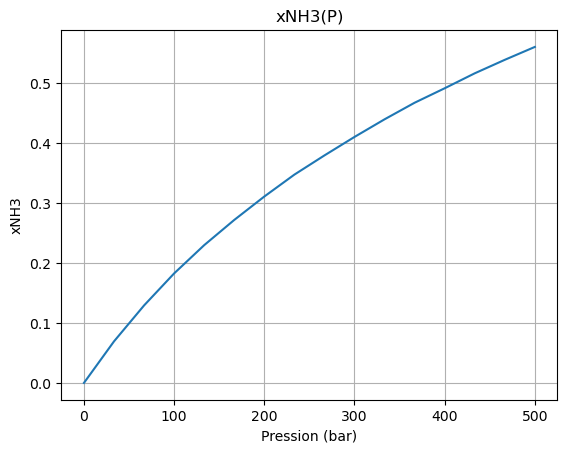

In [14]:
pression= np.linspace(.001,500,16)
xammo=[]
for p in pression:
    tau=rechercheDichoZero(f, 0, .999, .001,p)
    x=1/(17/(8*tau)-1)
    xammo.append(x)

#plt.figure(figsize=(7,5))
plt.plot(pression, xammo)
plt.ylabel('xNH3')
plt.xlabel('Pression (bar)')
plt.title('xNH3(P)')
plt.grid(True)
plt.show()